# 0.1 Imports

In [103]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import os

from typing import Dict, List, Tuple, Sequence
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 1. Data Import & Cleaning

In [104]:
current_dir = os.getcwd()
current_dir

'/home/jupyter/powder_alert2.0'

In [105]:
relative_path = os.path.dirname(current_dir)
relative_path

'/home/jupyter'

In [106]:
file_name = "powder_alert2.0/preprocessed_historical_data.csv"
file_path = os.path.join(relative_path, file_name)

df = pd.read_csv(file_path, parse_dates=['date'], usecols=lambda col: col != '')

In [107]:
df.dtypes

Unnamed: 0                             int64
date                          datetime64[ns]
snowfall                             float64
weather_code_encoded                 float64
temperature_2m                       float64
relative_humidity_2m                 float64
dew_point_2m                         float64
precipitation                        float64
rain                                 float64
snow_depth                           float64
pressure_msl                         float64
surface_pressure                     float64
cloud_cover                          float64
cloud_cover_low                      float64
cloud_cover_mid                      float64
cloud_cover_high                     float64
et0_fao_evapotranspiration           float64
vapour_pressure_deficit              float64
wind_speed_10m                       float64
wind_speed_100m                      float64
wind_direction_10m                   float64
wind_direction_100m                  float64
wind_gusts

In [108]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [109]:
df.shape

(131496, 29)

In [110]:
df.columns

Index(['date', 'snowfall', 'weather_code_encoded', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'rain',
       'snow_depth', 'pressure_msl', 'surface_pressure', 'cloud_cover',
       'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'sunshine_duration',
       'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos',
       'month_sin', 'month_cos'],
      dtype='object')

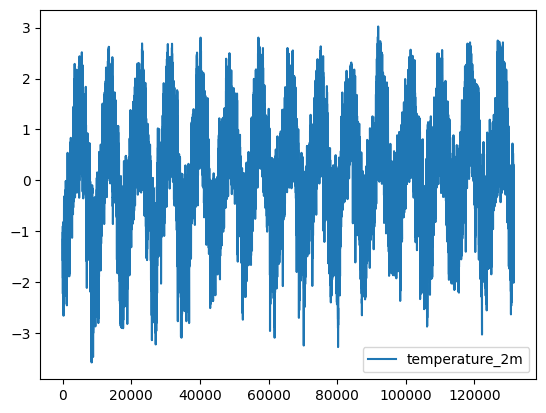

In [111]:
df.plot(y='temperature_2m');

# 2. Dataset

In [112]:
target2 = "temperature_2m"

In [113]:
df.head(3)

,date,snowfall,weather_code_encoded,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,2009-01-01 00:00:00,0.00,3.0,-1.565276,-0.359492,-1.676971,-0.389763,-0.272938,0.821605,0.915229,-0.344468,0.796798,-1.084686,1.525737,-0.266834,-0.609045,-0.468303,0.915814,0.615276,-0.038465,0.000227,0.164295,-0.722739,0.000000,1.000000,0.433884,-0.900969,0.0,1.0
1,2009-01-01 01:00:00,0.00,3.0,-1.541233,-0.304528,-1.632742,-0.389763,-0.272938,0.821605,0.915229,-0.327194,0.769715,-1.059035,1.525737,0.286362,-0.619531,-0.473445,0.465664,0.069724,-0.051303,0.052709,-0.149584,-0.722739,0.258819,0.965926,0.433884,-0.900969,0.0,1.0
2,2009-01-01 02:00:00,0.07,10.0,-1.523201,-0.267453,-1.601150,-0.191058,-0.272938,0.821605,0.890052,-0.333781,0.661382,-1.084686,1.367563,0.412089,-0.619531,-0.476742,0.184326,-0.303696,-0.036381,0.185151,-0.541932,-0.732331,0.500000,0.866025,0.433884,-0.900969,0.0,1.0


In [114]:
df = df.drop(columns='date')

In [115]:
correlation_matrix = df[num_columns].corr()
temperature_corr = correlation_matrix[target2]
high_corr_features = temperature_corr[abs(temperature_corr) > 0.55]
relevant_features = high_corr_features.index.tolist()
features = [col for col in relevant_features if col in df.columns and col != 'weather_code']
# df = df[features]

In [116]:
df.shape

(131496, 28)

In [117]:
df.head(3)

,snowfall,weather_code_encoded,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,0.00,3.0,-1.565276,-0.359492,-1.676971,-0.389763,-0.272938,0.821605,0.915229,-0.344468,0.796798,-1.084686,1.525737,-0.266834,-0.609045,-0.468303,0.915814,0.615276,-0.038465,0.000227,0.164295,-0.722739,0.000000,1.000000,0.433884,-0.900969,0.0,1.0
1,0.00,3.0,-1.541233,-0.304528,-1.632742,-0.389763,-0.272938,0.821605,0.915229,-0.327194,0.769715,-1.059035,1.525737,0.286362,-0.619531,-0.473445,0.465664,0.069724,-0.051303,0.052709,-0.149584,-0.722739,0.258819,0.965926,0.433884,-0.900969,0.0,1.0
2,0.07,10.0,-1.523201,-0.267453,-1.601150,-0.191058,-0.272938,0.821605,0.890052,-0.333781,0.661382,-1.084686,1.367563,0.412089,-0.619531,-0.476742,0.184326,-0.303696,-0.036381,0.185151,-0.541932,-0.732331,0.500000,0.866025,0.433884,-0.900969,0.0,1.0


# 3. Folds

In [118]:
rows = df.shape[0]
days = rows/24
weeks = days/7
months = weeks/4
years = months/ 12
print(f'DS includes {rows} rows --> hours')
print(f'DS includes {days} --> days')
print(f'DS includes {weeks} --> weeks')
print(f'DS includes {months} --> months')
print(f'DS includes {years} --> years')

DS includes 131496 rows --> hours
DS includes 5479.0 --> days
DS includes 782.7142857142857 --> weeks
DS includes 195.67857142857142 --> months
DS includes 16.306547619047617 --> years


In [119]:
FOLD_LENGTH = df.shape[0] # each fold will have the whole dataset --> only 1 fold in this model
FOLD_STRIDE = 1 # sliding only on hour
# Temporal Train-Test split
TRAIN_TEST_RATIO = 0.66
split_index = int(df.shape[0] * TRAIN_TEST_RATIO)
# Inputs
N_FEATURES = df.shape[1]
INPUT_LENGTH = 48 # 48 hours input = forecast the upcooming 48 hours
# Outputs
TARGET = target2
N_TARGETS = 1
OUTPUT_LENGTH = N_TARGETS * 48 # - Predicting one target, the temperature - for two days with predictions every hour
# Additional parameters
HORIZON = 1 # - We are predicting next two days
TARGET_COLUMN_IDX = df.columns.get_loc(target2)

In [120]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int) -> List[pd.DataFrame]:
    '''
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold

    Returns a list of folds, each as a DataFrame
    '''

    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds

In [121]:
folds = get_folds(df, FOLD_LENGTH, FOLD_STRIDE)

print(f'The function generated {len(folds)} folds.')
print(f'Each fold has a shape equal to {folds[0].shape}.')

The function generated 1 folds.
Each fold has a shape equal to (131496, 28).


In [122]:
fold = folds[0]

In [123]:
fold.shape

(131496, 28)

# 4. Creating Sequences

In [124]:
def train_test_split(fold: pd.DataFrame,
                     train_test_ratio: float,
                     input_length: int,
                     horizon: int) -> Tuple[pd.DataFrame]:
    '''
    Returns a train dataframe and a test dataframe (fold_train, fold_test)
    from which one can sample (X,y) sequences.
    df_train should contain all the timesteps until round(train_test_ratio * len(fold))
    '''

    # TRAIN SET
    # ======================
    last_train_idx = round(train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_idx, :]

    # TEST SET
    # ======================
    first_test_idx = last_train_idx - input_length
    fold_test = fold.iloc[first_test_idx:, :]

    return (fold_train, fold_test)

In [125]:
fold_train = df.iloc[:split_index]
fold_test = df.iloc[split_index:]

In [126]:
fold_train.shape, fold_test.shape

((86787, 28), (44709, 28))

In [127]:
fold_train.index[0]

0

In [128]:
# Inputs
print("##### INPUTS #####")
print(f'- INPUT_LENGTH = {INPUT_LENGTH} timesteps = {int(INPUT_LENGTH/24)} days = {int(INPUT_LENGTH/24/7)} weeks')
print(f'- N_FEATURES = {N_FEATURES}')
# Outputs
print("##### OUTPUTS #####")
print(f'- OUTPUT_LENGTH = {OUTPUT_LENGTH} timesteps = {int(OUTPUT_LENGTH/24)} day(s)')
print(f'- N_TARGETS = {N_TARGETS}')
# Parameters
print("##### PARAMETERS #####")
print(f'- HORIZON = {HORIZON} timesteps = {int(HORIZON/24)} day(s)')
# Train
print("##### TRAIN SET #####")
print(f"- The training fold starts at index {fold_train.index[0]} and stops at index {fold_train.index[-1]}.")
# Test
print("##### TEST SET #####")
print(f"- The test fold starts at index {fold_test.index[0]} and stops at index {fold_test.index[-1]}.")

##### INPUTS #####
- INPUT_LENGTH = 48 timesteps = 2 days = 0 weeks
- N_FEATURES = 28
##### OUTPUTS #####
- OUTPUT_LENGTH = 48 timesteps = 2 day(s)
- N_TARGETS = 1
##### PARAMETERS #####
- HORIZON = 1 timesteps = 0 day(s)
##### TRAIN SET #####
- The training fold starts at index 0 and stops at index 86786.
##### TEST SET #####
- The test fold starts at index 86787 and stops at index 131495.


In [129]:
# New: Scanning  through a fold
STRIDE = 1 # sliding every day, for instance
print(f'STRIDE = {STRIDE} timesteps = {int(STRIDE/24)} day(s)')

STRIDE = 1 timesteps = 0 day(s)


In [130]:
def get_Xi_yi(first_index: int,
              fold: pd.DataFrame,
              horizon: int,
              input_length: int,
              output_length: int) -> Tuple[np.ndarray, np.ndarray]:
    '''
    - extracts one sequence from a fold
    - returns a pair (Xi, yi) with:
        * len(Xi) = `input_length` and Xi starting at first_index
        * len(yi) = `output_length`
        * last_Xi and first_yi separated by the gap = horizon -1
    '''

    Xi_start = first_index
    Xi_last = Xi_start + input_length
    yi_start = Xi_last + horizon - 1
    yi_last = yi_start + output_length

    Xi = fold[Xi_start:Xi_last]
    yi = fold[yi_start:yi_last][TARGET]

    return (Xi, yi)

In [131]:
def get_X_y(fold: pd.DataFrame,
            horizon: int,
            input_length: int,
            output_length: int,
            stride: int,
            shuffle=False) -> Tuple[np.ndarray, np.ndarray]:
    """
    - Uses `data`, a 2D-array with axis=0 for timesteps, and axis=1 for (targets+covariates columns)
    - Returns a Tuple (X,y) of two ndarrays :
        * X.shape = (n_samples, input_length, n_covariates)
        * y.shape =
            (n_samples, output_length, n_targets) if all 3-dimensions are of size > 1
            (n_samples, output_length) if n_targets == 1
            (n_samples, n_targets) if output_length == 1
            (n_samples, ) if both n_targets and lenghts == 1
    - You can shuffle the pairs (Xi,yi) of your fold
    """

    X = []
    y = []

    for i in range(0, len(fold), stride):
        ## Extracting a sequence starting at index_i
        Xi, yi = get_Xi_yi(first_index=i,
                           fold=fold,
                           horizon=horizon,
                           input_length=input_length,
                           output_length=output_length)
        ## Exits loop as soon as we reach the end of the dataset
        if len(yi) < output_length:
            break
        X.append(Xi)
        y.append(yi)

    X = np.array(X)
    y = np.array(y)
    y = np.squeeze(y)

    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

    return X, y

In [132]:
X_train, y_train = get_X_y(fold=fold_train,
                           horizon=HORIZON,
                           input_length=INPUT_LENGTH,
                           output_length=OUTPUT_LENGTH,
                           stride=STRIDE)
X_test, y_test = get_X_y(fold=fold_test,
                         horizon=HORIZON,
                         input_length=INPUT_LENGTH,
                         output_length=OUTPUT_LENGTH,
                         stride=STRIDE)

print("Shapes for the training set:")
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")

print("Shapes for the test set:")
print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Shapes for the training set:
X_train.shape = (86692, 48, 28), y_train.shape = (86692, 48)
Shapes for the test set:
X_test.shape = (44614, 48, 28), y_test.shape = (44614, 48)


# 5. Modelling

## 5.1 Main Model

In [133]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Normalization, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

def init_model(X_train):
    reg_l2 = regularizers.L2(0.1)

    #========================================================================================

    # 1 - RNN architecture
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2])))

    # Recurrent Layer
    model.add(layers.LSTM(units=32, activation='tanh',return_sequences=True,
                        #   recurrent_dropout=0.3,dropout=0.3
                        )
                          )

    # Hidden Dense Layer that we are regularizing
    model.add(layers.Dense(16, activation="relu",
                        #    kernel_regularizer = reg_l2
                        )
                           )
    # model.add(layers.Dropout(rate=0.3))

    # Predictive Dense Layer
    model.add(layers.Dense(1, activation='linear'))

    #========================================================================================

    # 2 - Compiler
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='mse', optimizer=optimizer, metrics=["mae"])

    return model

In [134]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, ModelCheckpoint

def fit_model(model: tf.keras.Model, verbose=1) -> Tuple[tf.keras.Model, dict]:

    es = EarlyStopping(
        monitor="val_mae",
        patience=10,
        mode="min",
        restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(
        monitor='val_mae',
        factor=0.1,
        patience=5,
        min_lr=1e-6)

    checkpoint = ModelCheckpoint(
        'model_v1_best.keras', 
        monitor='val_mae',
        save_best_only=True,
        mode='min', 
        verbose=1)

    history = model.fit(
        X_train,
        y_train,
        validation_split=0.3,
        shuffle=False,
        batch_size=128,
        epochs=100,
        callbacks=[es, reduce_lr, checkpoint],
        verbose=verbose)

    return model, history

In [135]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax

In [136]:
model = init_model(X_train)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 48, 32)         │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 48, 16)         │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 48, 1)          │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,353 (32.63 KB)

 Trainable params: 8,353 (32.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0601 - mae: 0.8175
Epoch 1: val_mae improved from inf to 0.48550, saving model to model_v1_best.keras
475/475 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 1.0594 - mae: 0.8172 - val_loss: 0.4026 - val_mae: 0.4855 - learning_rate: 1.0000e-04
Epoch 2/100
473/475 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4537 - mae: 0.5117
Epoch 2: val_mae improved from 0.48550 to 0.40748, saving model to model_v1_best.keras
475/475 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 0.4530 - mae: 0.5113 - val_loss: 0.2799 - val_mae: 0.4075 - learning_rate: 1.0000e-04
Epoch 3/100
474/475 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2842 - mae: 0.4099
Epoch 3: val_mae improved from 0.40748 to 0.38781, saving model to model_v1_best.keras
475/475 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.2840 - mae: 0.4098 - val_loss: 0.2520 - val_mae: 0.3878 - learning_rate: 1.0000e-04
Epoch 4/100
474/475 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2415 - mae: 0.3801


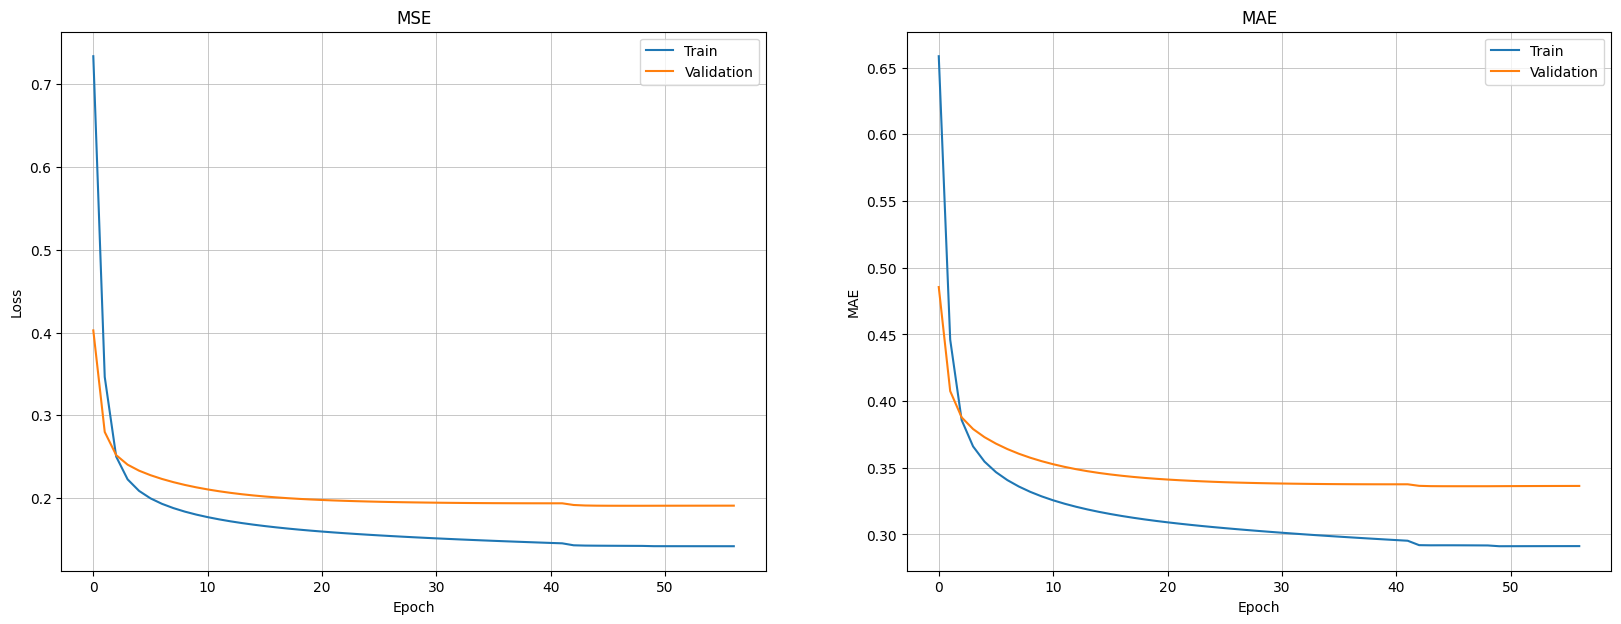

In [137]:
# 2 - Training
# ====================================
model, history = fit_model(model, verbose=1)

plot_history(history);

# 3 - Evaluation
# ====================================
res = model.evaluate(X_test, y_test)
print("-"*50)
print(f"The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")

## 5.2 Baseline

In [138]:
def last_seen_value_baseline(X_test, y_test, target_column_idx=0):
    """
    Baseline model that predicts the last observed value of the target variable (temperature).

    Parameters:
    X: Input features (shape: [num_samples, time_steps, num_features])
    y: Ground truth values (shape: [num_samples, time_steps, num_targets])
    target_column_idx: Index of the target variable in the input features

    Returns:
    baseline_mae: Mean Absolute Error (MAE) of the baseline model
    """
    # Get the last observed value of the target (temperature) for each sample
    last_seen_values = X_test[:, -1, target_column_idx].reshape(-1, 1)

    # Repeat this value for all the output steps
    output_length = y_test.shape[1]  # Number of time steps in the target sequence
    repeated = np.repeat(last_seen_values, axis=1, repeats=output_length)

    # Calculate the MAE: Mean of absolute errors
    mae = np.mean(np.abs(y_test - repeated))

    return mae

In [139]:
# 1 - Evaluation of the Baseline Model
# ====================================
mae_baseline = last_seen_value_baseline(X_test, y_test, target_column_idx=0)
print(f"- The Baseline MAE on the test set is equal to {round(mae_baseline,2)} Celsius degrees")

# 4 - Comparison with the LSTM model
# ====================================
print(f"- The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")
print(f"👉 Improvement/decrease of the LSTM model over the baseline (on this fold for the test set): {round((1 - (res[1]/mae_baseline))*100,2)} % 👈")

- The Baseline MAE on the test set is equal to 0.87 Celsius degrees
- The LSTM MAE on the test set is equal to 0.37 Celsius degrees
👉 Improvement/decrease of the LSTM model over the baseline (on this fold for the test set): 56.88 % 👈


## 5.3 Optimizing on Hyperparameters

In [140]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel
from keras_tuner import RandomSearch

class LSTMModel(HyperModel):
    def build(self, hp):
        reg_l2 = regularizers.L2(hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.001))

        #========================================================================================

        model = models.Sequential()

        # Input Layer
        model.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2])))

        # Recurrent Layer with tunable units and dropout
        model.add(layers.LSTM(
            units=hp.Int('units', min_value=16, max_value=128, step=16),
            activation='tanh',
            return_sequences=True,
            recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.05),
            dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.05)
        ))
        model.add(layers.LSTM(
            units=hp.Int('units', min_value=16, max_value=128, step=16),
            activation='tanh',
            return_sequences=True,
            recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.05),
            dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.05)
        ))

        # Hidden Dense Layer with tunable regularization
        model.add(layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation="relu",
            kernel_regularizer=reg_l2
        ))
        model.add(layers.Dropout(rate=hp.Float('dense_dropout', min_value=0.2, max_value=0.5, step=0.05)))

        # Output Layer
        model.add(layers.Dense(1, activation='linear'))

        #========================================================================================

        # Compile the model
        model.compile(
            loss='mse',
            optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
            metrics=["mae"]
        )

        return model

In [141]:
es = EarlyStopping(
    monitor="val_mae",
    patience=3,
    mode="min",
    restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.1,
    patience=3,
    min_lr=1e-6)

checkpoint = ModelCheckpoint(
    'model_v1_best.keras', 
    monitor='val_mae',
    save_best_only=True,
    mode='min', 
    verbose=1)


tuner = RandomSearch(
    LSTMModel(),  # The HyperModel class
    objective='val_mae',  # We want to minimize validation MAE
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='models',  # Directory to store logs and models
    project_name='temperature_hyperparameters')

tuner.search(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.3,  # Use a validation split
    callbacks=[es, reduce_lr, checkpoint])

Reloading Tuner from models/temperature_hyperparameters/tuner0.json


In [142]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build the best model with those hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[es, reduce_lr, checkpoint])

# Evaluate the best model on the test set
test_results = best_model.evaluate(X_test, y_test)
print(f"Test MAE: {test_results[1]} Celsius degrees")

Best Hyperparameters: {'l2_reg': 0.07200000000000001, 'units': 48, 'recurrent_dropout': 0.2, 'dropout': 0.25, 'dense_units': 96, 'dense_dropout': 0.4, 'learning_rate': 0.004817189232254613}
Epoch 1/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7658 - mae: 0.4194
Epoch 1: val_mae improved from inf to 0.35107, saving model to model_v1_best.keras
542/542 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - loss: 0.7651 - mae: 0.4193 - val_loss: 0.2196 - val_mae: 0.3511 - learning_rate: 0.0048
Epoch 2/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2210 - mae: 0.3569
Epoch 2: val_mae improved from 0.35107 to 0.34841, saving model to model_v1_best.keras
542/542 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - loss: 0.2210 - mae: 0.3569 - val_loss: 0.2166 - val_mae: 0.3484 - learning_rate: 0.0048
Epoch 3/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2070 - mae: 0.3461
Epoch 3: val_mae did not improve from 0.34841
542/542 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - loss: 0.2070 - mae: 0.3461 - val_l

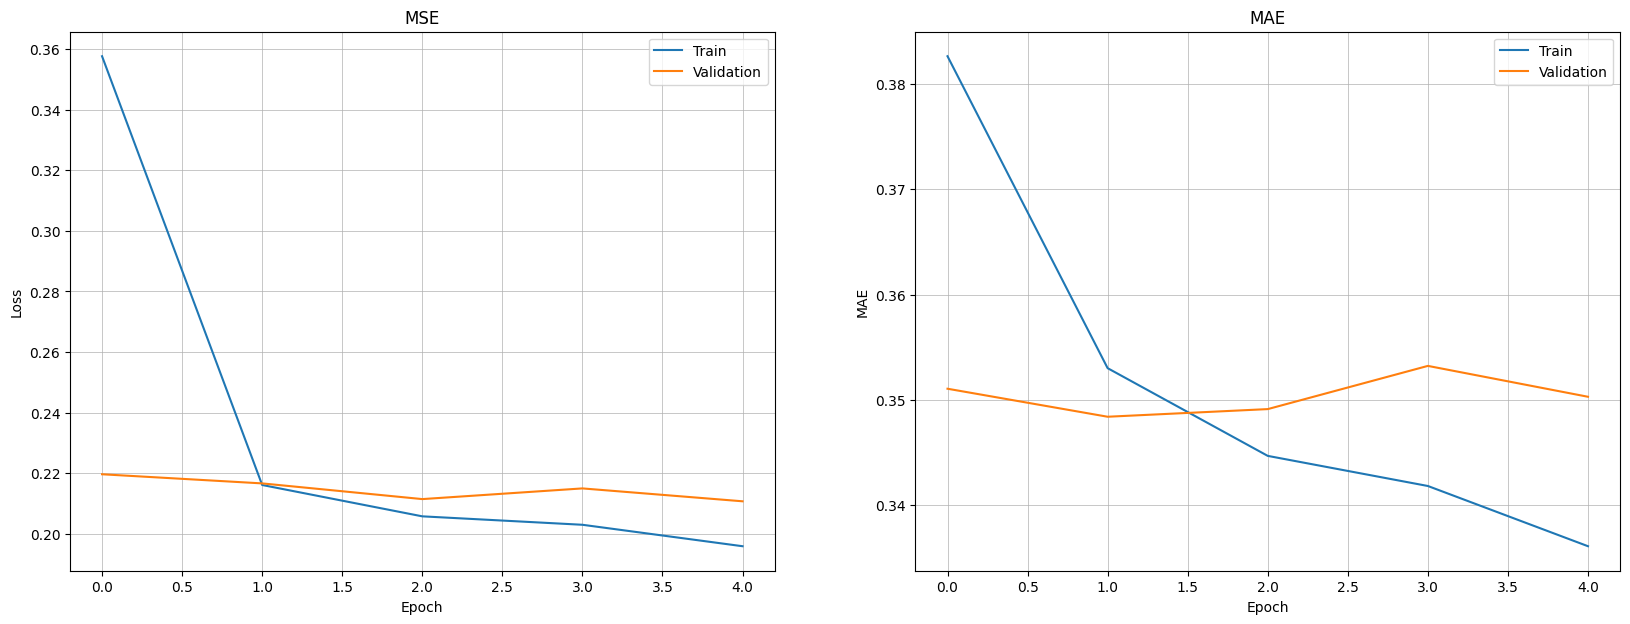

In [146]:
plot_history(history);

# 5.3. Safe/ Load model

In [147]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras import models

In [148]:
relative_path = os.path.dirname(current_dir)
models_folder = os.path.join(relative_path, "powder_alert2.0/models")

save_as_keras = os.path.join(models_folder, 'model_production.keras')

In [149]:
model.save(save_as_keras)

In [150]:
loaded_model_keras = tf.keras.models.load_model(save_as_keras)

# 6. Prediction

In [151]:
from datetime import datetime, timedelta

In [167]:
file_name = "powder_alert2.0/preprocessed_prediction_data.csv"
file_path = os.path.join(relative_path, file_name)

df = pd.read_csv(file_path, parse_dates=['date'], usecols=lambda col: col != '')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [168]:
df.head(2)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,2024-12-14 00:00:00,-2.074,55.0,-9.914110,0.0,0.0,0.0,0.22,3.0,1021.8,816.5264,100.0,0.0,100.0,100.0,0.012611,0.236865,7.28055,3.396233,261.46933,212.00534,25.919998,0.0,0.000000,1.000000,-0.974928,-0.222521,-0.5,0.866025
1,2024-12-14 01:00:00,-2.324,56.0,-9.919742,0.0,0.0,0.0,0.22,3.0,1021.4,816.0416,100.0,0.0,100.0,100.0,0.011692,0.227360,7.20000,3.600000,270.00000,216.86998,20.519999,0.0,0.258819,0.965926,-0.974928,-0.222521,-0.5,0.866025


In [183]:
current_time = datetime.now()
last_48h = df[(df['date'] <= current_time) & (df['date'] > current_time - timedelta(hours=48))]

In [184]:
last_48h = last_48h.drop(columns='date')

In [185]:
last_48h = np.expand_dims(last_48h, axis=0)

In [186]:
last_48h.shape

(1, 48, 28)

In [187]:
last_48h.dtype

dtype('float64')

In [188]:
best_model = loaded_model_keras

In [190]:
predictions = best_model.predict(last_48h)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [191]:
predicted_temperatures = predictions[0]
print(f'The temperature for the upcoming 48 h range from {predicted_temperatures.min()} to {predicted_temperatures.max()} Celsius degrees.')

The temperature for the upcoming 48 h range from -0.6723036766052246 to 0.9374794363975525 Celsius degrees.


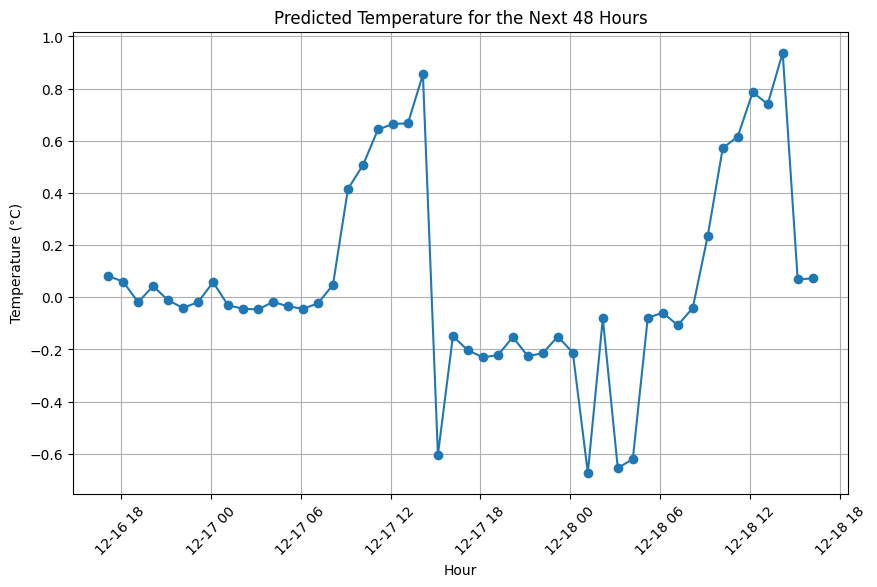

In [192]:
predicted_df = pd.DataFrame(predicted_temperatures, columns=["Predicted Temperature"])
predicted_df["Hour"] = pd.date_range(start=pd.to_datetime('now'), periods=48, freq='h')

# Plot the predicted temperatures
plt.figure(figsize=(10,6))
plt.plot(predicted_df["Hour"], predicted_df["Predicted Temperature"], marker='o')
plt.title("Predicted Temperature for the Next 48 Hours")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show();